<a href="https://colab.research.google.com/github/sirius93/machine-learning/blob/main/user-retention.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

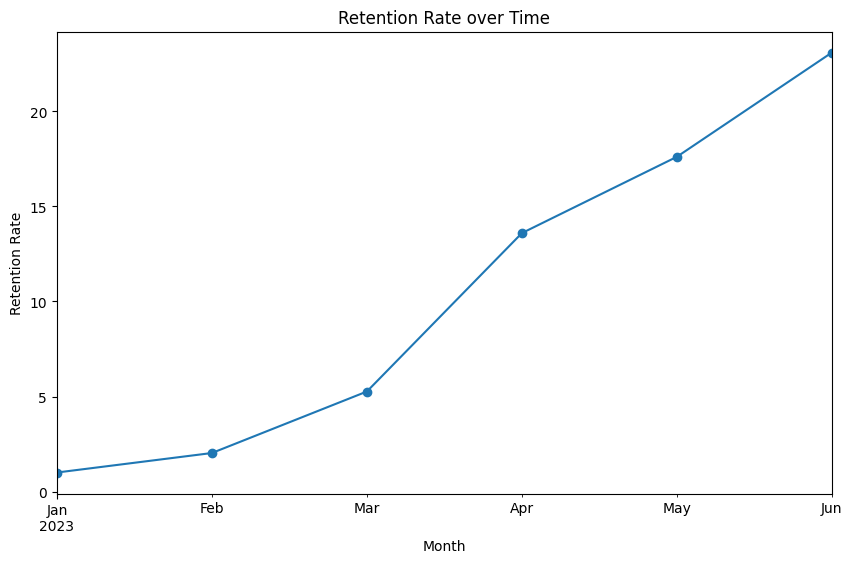

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files
uploaded = !wget https://storage.googleapis.com/dara-c1b52.appspot.com/daras_ai/media/c2809a08-141b-11ee-b6c2-8e93953183bb/gooey_inferences.json

# Assuming the uploaded file is named 'data.csv'
df = pd.read_json('gooey_inferences.json')

df['timestamp'] = pd.to_datetime(df['timestamp'])

df.set_index('timestamp', inplace=True)

start_time = pd.Timestamp('2023-01-01')
end_time = pd.Timestamp.today()
df = df[(df.index >= start_time) & (df.index <= end_time)]

df_grouped = df.groupby([df['user_id'], pd.Grouper(freq='M')]).size().reset_index(name='count')
df_filtered = df_grouped[df_grouped['count'] > 0]

initial_users = df_filtered[df_filtered['timestamp'] == df_filtered['timestamp'].min()]['user_id'].nunique()
df_filtered['retention_rate'] = df_filtered.groupby('timestamp')['user_id'].transform('nunique') / initial_users
plt.figure(figsize=(10, 6))
df_retention = df_filtered.groupby('timestamp')['retention_rate'].mean()
df_retention.plot(marker='o', linestyle='-')
plt.xlabel('Month')
plt.ylabel('Retention Rate')
plt.title('Retention Rate over Time')
plt.show()


